In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("E-com_Data.csv")
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
df.shape

(541116, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
# Unique values
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [6]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [7]:
df.isnull().sum()/len(df)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [8]:
# Data Cleaning

df.loc[df.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353.0,02-12-2017,1.0,2:07:00 PM,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579.0,09-12-2017,24.0,2:09:00 PM,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139.0,31-10-2017,1.0,2:04:00 PM,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588.0,11-06-2017,1.0,11:37:00 AM,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225.0,30-09-2017,1.0,12:31:00 PM,484.0,484.0,Location 36,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
541111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Drop the duplicate values
df = df.drop_duplicates(ignore_index = True)
df.loc[df.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set


In [10]:
df.shape

(537971, 12)

In [11]:
# We will drop the missing data for CustomerID "Row wise"

In [12]:
df.isnull().sum()

CustomerID           133790
Item Code                 1
InvoieNo                  1
Date of purchase          1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [13]:
df = df.dropna(subset= ['CustomerID'])

In [14]:
df.isnull().sum()

CustomerID                0
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [15]:
df['date'] = pd.to_datetime(df['Date of purchase'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  float64       
 3   Date of purchase   404181 non-null  object        
 4   Quantity           404181 non-null  float64       
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    object        
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  date               404181 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(6)


In [16]:
df = df.drop(['Sold as set','Reason of return','Cancelled_status', 'Date of purchase'], axis=1)
df.shape

(404181, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  float64       
 3   Quantity           404181 non-null  float64       
 4   Time               404181 non-null  object        
 5   price per Unit     404181 non-null  float64       
 6   Price              404181 non-null  float64       
 7   Shipping Location  404181 non-null  object        
 8   date               404181 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 30.8+ MB


In [ ]:
# Objective: Build an unsupervised learning model which can enable your company to analyze their customers.. 
#..via RFM (Recency, Frequency and Monetary value) approach.

## Recency = Latest Date - last invoice date
# Latest Date = Today's date or 

## Frequency = No. of Invoices of the tranction by CustomerID

## Monetary = Sum of total amount purchased by CustomerID



In [18]:
# Last Date- 2017-12-19
# Latest Date - 2017-12-20

import datetime as dt
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [19]:
df['Recency'] = df['date']
df['Frequency'] = df['date']
df['Monetary'] = df['Price']

In [20]:
# Create RFM model by each customer

RMF_score = df.groupby('CustomerID').agg({'Recency': lambda x: (latest_date-x.max()).days,
                                          'Frequency': lambda x : x.count(),
                                          'Monetary': lambda x : x.sum()})

In [25]:
RMF_score = RMF_score.reset_index()

In [ ]:
## EDA ##`

In [27]:
RMF_score.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [28]:
# Split the data into four segments using quantile method
quantiles = RMF_score.quantile(q = [0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [ ]:
# Recency- Lesser the better
# Frequency - Higher the better
# Monetary - Higher the better

In [29]:
# Creating a funtion to define R,F & M segment

def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x<= d[p][0.5]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1
    

In [30]:
RMF_score['R'] = RMF_score['Recency'].apply(Rscoring, args= ('Recency', quantiles,))
RMF_score['F'] = RMF_score['Frequency'].apply(FnMscoring, args= ('Frequency', quantiles,))
RMF_score['M'] = RMF_score['Monetary'].apply(FnMscoring, args= ('Monetary', quantiles,))

In [31]:
RMF_score.head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,182,553704.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
5,7.0,208,4,9410.0,4,4,4
6,8.0,234,58,135550.0,4,2,2
7,9.0,15,13,65832.0,2,4,3
8,10.0,16,58,331601.0,2,2,1
9,11.0,9,131,771439.0,1,1,1


In [ ]:
# RMF_score['Group'] = RMF_score['R']+ RMF_score['F'] + RMF_score['M']
# RMF_score.head()

In [ ]:
# RMF_score['Group'].unique()

In [ ]:
# RMF_score.info()

In [ ]:
# RMF_score['R'] = RMF_score['R'].astype('str')
# RMF_score['F'] = RMF_score['F'].astype('str')
# RMF_score['M'] = RMF_score['M'].astype('str')

In [ ]:
# RMF_score['Cluster'] = RMF_score['R'] + RMF_score['F'] + RMF_score['M']
# RMF_score.head()

In [ ]:
# RMF_score['Cluster'].unique()

In [ ]:
# Best Recency = 1
# Best Frequency = 1
# Best Monetary = 1

In [32]:
RMF_score['RFM_group'] = RMF_score.R.map(str) + RMF_score.F.map(str) + RMF_score.M.map(str)
RMF_score.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_group
0,2.0,4,182,553704.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122


In [33]:
RMF_score['RFM_score'] = RMF_score[['R','F','M']].sum(axis=1)
RMF_score.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score
0,2.0,4,182,553704.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5


In [35]:
# Assign loyality label to each customer

loyality_level = ['Diamond', 'Platinum', 'Gold', 'Silver']

score_cuts = pd.qcut(RMF_score.RFM_score, q = 4, labels = loyality_level)
RMF_score['Loyality_level'] = score_cuts.values
RMF_score.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score,Loyality_level
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond
1,3.0,77,27,257404.0,4,3,1,431,8,Platinum
2,4.0,20,72,176613.0,3,2,2,322,7,Platinum
3,5.0,18,16,41976.0,2,4,3,243,9,Gold
4,6.0,9,84,151822.0,1,2,2,122,5,Diamond
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,234,58,135550.0,4,2,2,422,8,Platinum
7,9.0,15,13,65832.0,2,4,3,243,9,Gold
8,10.0,16,58,331601.0,2,2,1,221,5,Diamond
9,11.0,9,131,771439.0,1,1,1,111,3,Diamond


In [36]:
# Validate the data for RFM_hroup = 111

RMF_score[RMF_score['RFM_group'] == '111'].sort_values('Monetary', ascending = False).head(30)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score,Loyality_level
1694,1704.0,3,2053,35536194.0,1,1,1,111,3,Diamond
1886,1896.0,2,5874,17743855.0,1,1,1,111,3,Diamond
54,56.0,10,757,14357682.0,1,1,1,111,3,Diamond
1337,1346.0,9,1395,12647317.0,1,1,1,111,3,Diamond
3780,3802.0,3,1060,12319439.0,1,1,1,111,3,Diamond
4211,4234.0,3,322,10654918.0,1,1,1,111,3,Diamond
998,1006.0,5,571,9351019.0,1,1,1,111,3,Diamond
3186,3203.0,5,269,8102167.0,1,1,1,111,3,Diamond
2181,2193.0,1,2489,7966054.0,1,1,1,111,3,Diamond
1438,1448.0,5,1638,7892625.0,1,1,1,111,3,Diamond


In [37]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [38]:
# Recency and Frequency don't have any negetive value

RMF_score['Monetary'] = [handle_neg_n_zero(x) for x in RMF_score['Monetary']]

In [39]:
new_data = RMF_score[['Recency','Frequency','Monetary']]
new_data.head(5)

,Recency,Frequency,Monetary
0,4,182,553704.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0


# Feature Scaling

<Axes: ylabel='Monetary'>

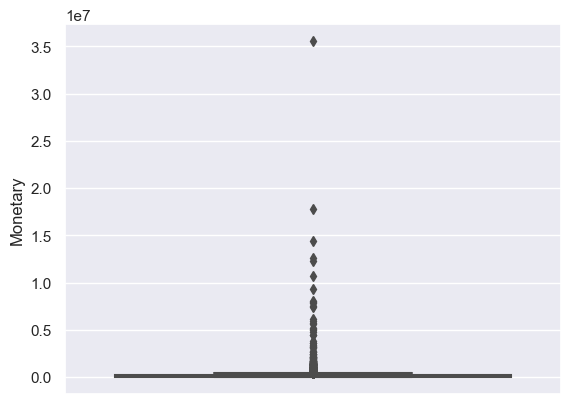

In [40]:
sns.boxplot(y='Monetary', data= new_data)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
scaled_data

array([[-0.64079551,  0.38379456,  0.37766904],
       [ 0.17351282, -0.28413542,  0.03198725],
       [-0.46231697, -0.09022026, -0.0622685 ],
       ...,
       [-0.55155624, -0.34446458, -0.23919388],
       [-0.64079551,  2.84867167,  0.05905846],
       [-0.1165148 , -0.09883872,  0.03830589]])

In [42]:
scaled_data = pd.DataFrame(scaled_data, index=RMF_score.index, columns= new_data.columns)
scaled_data.head()

,Recency,Frequency,Monetary
0,-0.640796,0.383795,0.377669
1,0.173513,-0.284135,0.031987
2,-0.462317,-0.090220,-0.062268
3,-0.484627,-0.331537,-0.219344
4,-0.585021,-0.038510,-0.091191


# Building Clustering Models

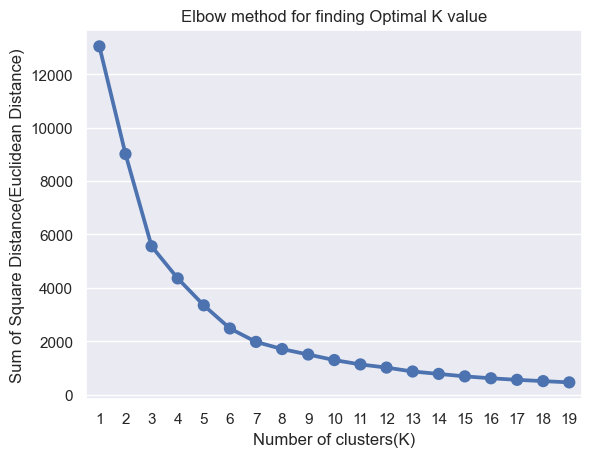

In [43]:
from sklearn.cluster import KMeans

sum_sq_dist = {}
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=1000, random_state=1)
    km = kmeans.fit(scaled_data)
    sum_sq_dist[i] = km.inertia_
    

# Vizualization for Elbow method (to find actual k value)

sns.pointplot(x=list(sum_sq_dist.keys()),
             y = list(sum_sq_dist.values()))
plt.xlabel("Number of clusters(K)")
plt.ylabel("Sum of Square Distance(Euclidean Distance)")
plt.title("Elbow method for finding Optimal K value")
plt.show()

In [44]:
km = KMeans(n_clusters= 4, init ='k-means++', max_iter=1000)
y_kmeans = km.fit_predict(scaled_data)
y_kmeans

array([3, 3, 3, ..., 3, 3, 3])

In [45]:
RMF_score.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score,Loyality_level
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond
1,3.0,77,27,257404.0,4,3,1,431,8,Platinum
2,4.0,20,72,176613.0,3,2,2,322,7,Platinum
3,5.0,18,16,41976.0,2,4,3,243,9,Gold
4,6.0,9,84,151822.0,1,2,2,122,5,Diamond


In [46]:
RMF_score['Cluster'] = km.labels_
RMF_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_group,RFM_score,Loyality_level,Cluster
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond,3
1,3.0,77,27,257404.0,4,3,1,431,8,Platinum,3
2,4.0,20,72,176613.0,3,2,2,322,7,Platinum,3
3,5.0,18,16,41976.0,2,4,3,243,9,Gold,3
4,6.0,9,84,151822.0,1,2,2,122,5,Diamond,3


# Visualization

In [47]:
final_report = RMF_score.groupby('Loyality_level')[['Recency','Frequency','Monetary', 'CustomerID']].agg({
    'Recency':'mean', 'Frequency':'mean','Monetary':'mean','CustomerID': 'nunique'
}).reset_index()

In [49]:
final_report

,Loyality_level,Recency,Frequency,Monetary,CustomerID
0,Diamond,10.200000,227.785496,585979.422137,1310
1,Platinum,32.593629,57.475524,124483.261072,1287
2,Gold,84.019169,25.174654,56290.335570,939
3,Silver,163.617466,10.051661,23998.172202,813


In [51]:
final_report = final_report.rename(columns={'CustomerID':"NoBuyers"})
final_report['Percentage'] = round(final_report['NoBuyers']/final_report['NoBuyers'].sum()*100,2)
final_report

,Loyality_level,Recency,Frequency,Monetary,NoBuyers,Percentage
0,Diamond,10.200000,227.785496,585979.422137,1310,30.12
1,Platinum,32.593629,57.475524,124483.261072,1287,29.59
2,Gold,84.019169,25.174654,56290.335570,939,21.59
3,Silver,163.617466,10.051661,23998.172202,813,18.69


In [52]:
# squarify and plotly
!pip install squarify
!pip install plotly

In [53]:
import squarify
final_report_1 = final_report[['Loyality_level', 'NoBuyers', 'Percentage']]
final_report_1

,Loyality_level,NoBuyers,Percentage
0,Diamond,1310,30.12
1,Platinum,1287,29.59
2,Gold,939,21.59
3,Silver,813,18.69


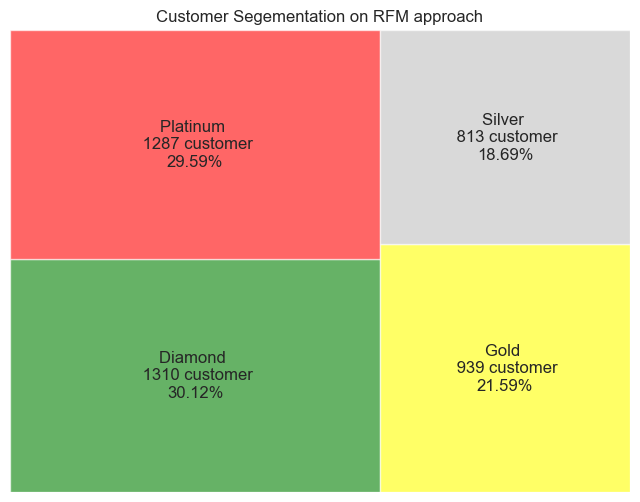

In [59]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8,6)
color_dics = {'Diamond': 'green', 'Platinum':'red', 'Gold':'yellow','Silver':'silver'}
squarify.plot(sizes=final_report_1['NoBuyers'], color=color_dics.values(),
              label=['{} \n {:.0f} customer\n{}%'.format(*final_report_1.iloc[i])
                    for i in range(0, len(final_report_1))], alpha=0.6)
plt.title("Customer Segementation on RFM approach")
plt.axis('off')
plt.show()